### From the Great Peter Norvig @ norvig.com, derived from the following:
http://nbviewer.jupyter.org/url/norvig.com/ipython/How%20to%20Do%20Things%20with%20Words.ipynb

### Data:  Text and Words

In [1]:
# Boring preliminaries
%pylab inline
import re
import math
import string
from collections import Counter
from __future__ import division

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [11]:
TEXT = file('/root/pipeline/datasets/nlp/big.txt').read()
len(TEXT)

6488666

In [15]:
def tokens(text):
    "List all the word tokens (consecutive letters) in a text. Normalize to lowercase."
    return re.findall('[a-z]+', text.lower()) 

In [16]:
tokens('This is: A test, 1, 2, 3, this is.')

['this', 'is', 'a', 'test', 'this', 'is']

In [19]:
WORDS = tokens(TEXT)
len(WORDS)

1105285

In [20]:
print(WORDS[:10])

['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'adventures', 'of', 'sherlock', 'holmes']


### Model:  Bag of Words

In [21]:
def sample(bag, n=10):
    "Sample a random n-word sentence from the model described by the bag of words."
    return ' '.join(random.choice(bag) for _ in range(n))

In [24]:
sample(WORDS)

'me small providing was ulcer the that appeared came in'

In [25]:
Counter(tokens('Is this a test? It is a test!'))

Counter({'a': 2, 'is': 2, 'it': 1, 'test': 2, 'this': 1})

In [26]:
COUNTS = Counter(WORDS)

print COUNTS.most_common(10)

[('the', 80030), ('of', 40025), ('and', 38313), ('to', 28766), ('in', 22050), ('a', 21155), ('that', 12512), ('he', 12401), ('was', 11410), ('it', 10681)]


In [27]:
for w in tokens('the rare and neverbeforeseen words'):
    print COUNTS[w], w

80030 the
83 rare
38313 and
0 neverbeforeseen
460 words


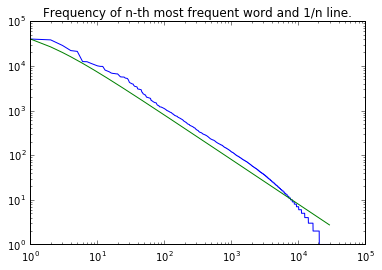

In [28]:
M = COUNTS['the']
yscale('log'); xscale('log'); title('Frequency of n-th most frequent word and 1/n line.')
plot([c for (w, c) in COUNTS.most_common()])
plot([M/i for i in range(1, len(COUNTS)+1)]);

### Task:  Spell Correction

In [30]:
def correct(word):
    "Find the best spelling correction for this word."
    # Prefer edit distance 0, then 1, then 2; otherwise default to word itself.
    candidates = (known(edits0(word)) or 
                  known(edits1(word)) or 
                  known(edits2(word)) or 
                  [word])
    return max(candidates, key=COUNTS.get)

In [31]:
def known(words):
    "Return the subset of words that are actually in the dictionary."
    return {w for w in words if w in COUNTS}

def edits0(word): 
    "Return all strings that are zero edits away from word (i.e., just word itself)."
    return {word}

def edits2(word):
    "Return all strings that are two edits away from this word."
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}

In [32]:
def edits1(word):
    "Return all strings that are one edit away from this word."
    pairs      = splits(word)
    deletes    = [a+b[1:]           for (a, b) in pairs if b]
    transposes = [a+b[1]+b[0]+b[2:] for (a, b) in pairs if len(b) > 1]
    replaces   = [a+c+b[1:]         for (a, b) in pairs for c in alphabet if b]
    inserts    = [a+c+b             for (a, b) in pairs for c in alphabet]
    return set(deletes + transposes + replaces + inserts)

def splits(word):
    "Return a list of all possible (first, rest) pairs that comprise word."
    return [(word[:i], word[i:]) 
            for i in range(len(word)+1)]

alphabet = 'abcdefghijklmnopqrstuvwxyz'

In [33]:
splits('wird')

[('', 'wird'), ('w', 'ird'), ('wi', 'rd'), ('wir', 'd'), ('wird', '')]

In [34]:
print edits0('wird')

set(['wird'])


In [35]:
print edits1('wird')

set(['wirdh', 'wirdw', 'jird', 'wiid', 'wirj', 'wiprd', 'rird', 'wkird', 'wiqrd', 'wrird', 'wisrd', 'zwird', 'wiqd', 'wizrd', 'wirs', 'wrd', 'wqird', 'tird', 'wirdp', 'wrrd', 'wzrd', 'wiad', 'nird', 'wirsd', 'wixd', 'wxird', 'lird', 'eird', 'wmird', 'wihd', 'wirp', 'lwird', 'wirzd', 'widrd', 'wxrd', 'ewird', 'wirdx', 'wirkd', 'hwird', 'wipd', 'wirnd', 'uwird', 'wirz', 'mwird', 'wjrd', 'wirjd', 'wirrd', 'wirdd', 'wsird', 'bwird', 'wcrd', 'xwird', 'wdird', 'wibrd', 'wikd', 'wiryd', 'wiord', 'gird', 'wtird', 'wbrd', 'nwird', 'wlrd', 'wgird', 'wmrd', 'wirf', 'wirg', 'wird', 'wire', 'wirb', 'wirc', 'wira', 'wkrd', 'wiro', 'wirl', 'wirm', 'iird', 'wirk', 'wirh', 'wiri', 'wirv', 'wirw', 'wirt', 'wiru', 'wirr', 'wicd', 'cird', 'wirq', 'wirqd', 'wizd', 'wirhd', 'ird', 'bird', 'wirx', 'wiry', 'wvrd', 'widr', 'wprd', 'wirad', 'wijd', 'wirxd', 'uird', 'wirdb', 'qwird', 'dird', 'wnrd', 'wjird', 'gwird', 'whrd', 'wtrd', 'woird', 'rwird', 'wurd', 'wijrd', 'witrd', 'wwrd', 'dwird', 'vwird', 'wibd', 'w

In [36]:
print len(edits2('wird'))

24254


In [37]:
map(correct, tokens('Speling errurs in somethink. Whutever; unusuel misteakes everyware?'))

['spelling',
 'errors',
 'in',
 'something',
 'whatever',
 'unusual',
 'mistakes',
 'everywhere']

In [38]:
def correct_text(text):
    "Correct all the words within a text, returning the corrected text."
    return re.sub('[a-zA-Z]+', correct_match, text)

def correct_match(match):
    "Spell-correct word in match, and preserve proper upper/lower/title case."
    word = match.group()
    return case_of(word)(correct(word.lower()))

def case_of(text):
    "Return the case-function appropriate for text: upper, lower, title, or just str."
    return (str.upper if text.isupper() else
            str.lower if text.islower() else
            str.title if text.istitle() else
            str)

In [39]:
map(case_of, ['UPPER', 'lower', 'Title', 'CamelCase'])

[<method 'upper' of 'str' objects>,
 <method 'lower' of 'str' objects>,
 <method 'title' of 'str' objects>,
 str]

In [40]:
correct_text('Speling Errurs IN somethink. Whutever; unusuel misteakes?')

'Spelling Errors IN something. Whatever; unusual mistakes?'

In [41]:
correct_text('Audiance sayzs: tumblr ...')

'Audience says: tumbler ...'

In [42]:
def pdist(counter):
    "Make a probability distribution, given evidence from a Counter."
    N = sum(counter.values())
    return lambda x: counter[x]/N

P = pdist(COUNTS)

In [43]:
for w in tokens('"The" is most common word in English'):
    print P(w), w

0.0724066643445 the
0.00884296810325 is
0.000821507574969 most
0.00025966153526 common
0.000269613719538 word
0.0199496057578 in
0.000190900989338 english


In [44]:
def Pwords(words):
    "Probability of words, assuming each word is independent of others."
    return product(Pword(w) for w in words)

def product(nums):
    "Multiply the numbers together.  (Like `sum`, but with multiplication.)"
    result = 1
    for x in nums:
        result *= x
    return result

In [45]:
tests = ['this is a test', 
         'this is a unusual test',
         'this is a neverbeforeseen test']

for test in tests:
    print Pwords(tokens(test)), test

NameError: global name 'Pword' is not defined

### Task:  Word Segementation

In [46]:
def memo(f):
    "Memoize function f, whose args must all be hashable."
    cache = {}
    def fmemo(*args):
        if args not in cache:
            cache[args] = f(*args)
        return cache[args]
    fmemo.cache = cache
    return fmemo

In [49]:
max(len(w) for w in COUNTS)

18

In [50]:
def splits(text, start=0, L=20):
    "Return a list of all (first, rest) pairs; start <= len(first) <= L."
    return [(text[:i], text[i:]) 
            for i in range(start, min(len(text), L)+1)]

In [51]:
print splits('word')
print splits('reallylongtext', 1, 4)

[('', 'word'), ('w', 'ord'), ('wo', 'rd'), ('wor', 'd'), ('word', '')]
[('r', 'eallylongtext'), ('re', 'allylongtext'), ('rea', 'llylongtext'), ('real', 'lylongtext')]


In [52]:
@memo
def segment(text):
    "Return a list of words that is the most probable segmentation of text."
    if not text: 
        return []
    else:
        candidates = ([first] + segment(rest) 
                      for (first, rest) in splits(text, 1))
        return max(candidates, key=Pwords)

In [53]:
segment('choosespain')

NameError: global name 'Pword' is not defined

In [54]:
segment('speedofart')

NameError: global name 'Pword' is not defined

In [55]:
decl = ('wheninthecourseofhumaneventsitbecomesnecessaryforonepeople' +
        'todissolvethepoliticalbandswhichhaveconnectedthemwithanother' +
        'andtoassumeamongthepowersoftheearththeseparateandequalstation' +
        'towhichthelawsofnatureandofnaturesgodentitlethem')

In [56]:
print(segment(decl))

NameError: global name 'Pword' is not defined

In [57]:
Pwords(segment(decl))

NameError: global name 'Pword' is not defined

In [58]:
Pwords(segment(decl * 2))

RuntimeError: maximum recursion depth exceeded in cmp

In [59]:
Pwords(segment(decl * 3))

RuntimeError: maximum recursion depth exceeded in cmp

In [60]:
segment('smallandinsignificant')

NameError: global name 'Pword' is not defined

In [61]:
segment('largeandinsignificant')

NameError: global name 'Pword' is not defined

In [62]:
print(Pwords(['large', 'and', 'insignificant']))
print(Pwords(['large', 'and', 'in', 'significant']))

NameError: global name 'Pword' is not defined

### Data:  More is Better

In [63]:
def load_counts(filename, sep='\t'):
    """Return a Counter initialized from key-value pairs, 
    one on each line of filename."""
    C = Counter()
    for line in open(filename):
        key, count = line.split(sep)
        C[key] = int(count)
    return C

In [65]:
COUNTS1 = load_counts('/root/pipeline/datasets/nlp/count_1w.txt')
COUNTS2 = load_counts('/root/pipeline/datasets/nlp/count_2w.txt')

P1w = pdist(COUNTS1)
P2w = pdist(COUNTS2)

In [66]:
print len(COUNTS1), sum(COUNTS1.values())/1e9
print len(COUNTS2), sum(COUNTS2.values())/1e9

333333 588.124220187
286358 225.955251755


In [67]:
COUNTS2.most_common(30)

[('of the', 2766332391),
 ('in the', 1628795324),
 ('to the', 1139248999),
 ('on the', 800328815),
 ('for the', 692874802),
 ('and the', 629726893),
 ('to be', 505148997),
 ('is a', 476718990),
 ('with the', 461331348),
 ('from the', 428303219),
 ('by the', 417106045),
 ('at the', 416201497),
 ('of a', 387060526),
 ('in a', 364730082),
 ('will be', 356175009),
 ('that the', 333393891),
 ('do not', 326267941),
 ('is the', 306482559),
 ('to a', 279146624),
 ('is not', 276753375),
 ('for a', 274112498),
 ('with a', 271525283),
 ('as a', 270401798),
 ('<S> and', 261891475),
 ('of this', 258707741),
 ('<S> the', 258483382),
 ('it is', 245002494),
 ('can be', 230215143),
 ('If you', 210252670),
 ('has been', 196769958)]

### Theory and Practice:  Segmentation with Bigrams

In [68]:
def Pwords2(words, prev='<S>'):
    "The probability of a sequence of words, using bigram data, given prev word."
    return product(cPword(w, (prev if (i == 0) else words[i-1]) )
                   for (i, w) in enumerate(words))

# Change Pwords to use P1w (the bigger dictionary) instead of Pword
def Pwords(words):
    "Probability of words, assuming each word is independent of others."
    return product(P1w(w) for w in words)

def cPword(word, prev):
    "Conditional probability of word, given previous word."
    bigram = prev + ' ' + word
    if P2w(bigram) > 0 and P1w(prev) > 0:
        return P2w(bigram) / P1w(prev)
    else: # Average the back-off value and zero.
        return P1w(word) / 2

In [69]:
print Pwords(tokens('this is a test'))
print Pwords2(tokens('this is a test'))
print Pwords2(tokens('is test a this'))

1.78739820006e-10
6.41367629438e-08
1.18028600367e-11


In [70]:
@memo 
def segment2(text, prev='<S>'): 
    "Return best segmentation of text; use bigram data." 
    if not text: 
        return []
    else:
        candidates = ([first] + segment2(rest, first) 
                      for (first, rest) in splits(text, 1))
        return max(candidates, key=lambda words: Pwords2(words, prev))

In [71]:
print segment2('choosespain')
print segment2('speedofart')
print segment2('smallandinsignificant')
print segment2('largeandinsignificant')

['choose', 'spain']
['speed', 'of', 'art']
['small', 'and', 'in', 'significant']
['large', 'and', 'in', 'significant']


In [72]:
adams = ('faroutintheunchartedbackwatersoftheunfashionableendofthewesternspiral' +
         'armofthegalaxyliesasmallunregardedyellowsun')
print segment(adams)
print segment2(adams)

['far', 'out', 'in', 'the', 'uncharted', 'backwaters', 'of', 'the', 'unfashionable', 'end', 'of', 'the', 'western', 'spiral', 'arm', 'of', 'the', 'galaxy', 'lies', 'a', 'small', 'un', 'regarded', 'yellow', 'sun']
['far', 'out', 'in', 'the', 'uncharted', 'backwaters', 'of', 'the', 'unfashionable', 'end', 'of', 'the', 'western', 'spiral', 'arm', 'of', 'the', 'galaxy', 'lies', 'a', 'small', 'un', 'regarded', 'yellow', 'sun']


In [73]:
P1w('unregarded')

0.0

In [74]:
tolkein = 'adrybaresandyholewithnothinginittositdownonortoeat'
print segment(tolkein)
print segment2(tolkein)

['a', 'dry', 'bare', 'sandy', 'hole', 'with', 'nothing', 'in', 'it', 'to', 'sitdown', 'on', 'or', 'to', 'eat']
['a', 'dry', 'bare', 'sandy', 'hole', 'with', 'nothing', 'in', 'it', 'to', 'sit', 'down', 'on', 'or', 'to', 'eat']


### Evaluation

In [75]:
def test_segmenter(segmenter, tests):
    "Try segmenter on tests; report failures; return fraction correct."
    return sum([test_one_segment(segmenter, test) 
               for test in tests]), len(tests)

def test_one_segment(segmenter, test):
    words = tokens(test)
    result = segmenter(cat(words))
    correct = (result == words)
    if not correct:
        print 'expected', words
        print 'got     ', result
    return correct

proverbs = ("""A little knowledge is a dangerous thing
  A man who is his own lawyer has a fool for his client
  All work and no play makes Jack a dull boy
  Better to remain silent and be thought a fool that to speak and remove all doubt;
  Do unto others as you would have them do to you
  Early to bed and early to rise, makes a man healthy, wealthy and wise
  Fools rush in where angels fear to tread
  Genius is one percent inspiration, ninety-nine percent perspiration
  If you lie down with dogs, you will get up with fleas
  Lightning never strikes twice in the same place
  Power corrupts; absolute power corrupts absolutely
  Here today, gone tomorrow
  See no evil, hear no evil, speak no evil
  Sticks and stones may break my bones, but words will never hurt me
  Take care of the pence and the pounds will take care of themselves
  Take care of the sense and the sounds will take care of themselves
  The bigger they are, the harder they fall
  The grass is always greener on the other side of the fence
  The more things change, the more they stay the same
  Those who do not learn from history are doomed to repeat it"""
  .splitlines())

In [76]:
test_segmenter(segment, proverbs)

NameError: global name 'cat' is not defined

In [77]:
test_segmenter(segment2, proverbs)

NameError: global name 'cat' is not defined

### Smoothing

In [78]:
tests = ['this is a test', 
         'this is a unusual test',
         'this is a nongovernmental test',
         'this is a neverbeforeseen test',
         'this is a zqbhjhsyefvvjqc test']

for test in tests:
    print Pwords(tokens(test)), test

1.78739820006e-10 this is a test
3.78675425278e-15 this is a unusual test
1.31179474235e-16 this is a nongovernmental test
0.0 this is a neverbeforeseen test
0.0 this is a zqbhjhsyefvvjqc test


In [79]:
def pdist_additive_smoothed(counter, c=1):
    """The probability of word, given evidence from the counter.
    Add c to the count for each item, plus the 'unknown' item."""
    N = sum(counter.values())          # Amount of evidence
    Nplus = N + c * (len(counter) + 1) # Evidence plus fake observations
    return lambda word: (counter[word] + c) / Nplus 

P1w = pdist_additive_smoothed(COUNTS1)

In [80]:
P1w('neverbeforeseen')

1.7003201005861308e-12

In [81]:
segment('thisisatestofsegmentationofalongsequenceofwords')

['thisisatestofsegment', 'ationofalongsequence', 'of', 'words']

In [82]:
singletons = (w for w in COUNTS if COUNTS[w] == 1)

lengths = map(len, singletons)

Counter(lengths).most_common()

[(7, 1357),
 (8, 1356),
 (9, 1175),
 (6, 1113),
 (10, 938),
 (5, 747),
 (11, 627),
 (12, 398),
 (4, 368),
 (13, 215),
 (3, 159),
 (14, 112),
 (2, 51),
 (15, 37),
 (16, 10),
 (17, 7)]

In [83]:
1357 / sum(COUNTS.values())

0.0012277376423275445

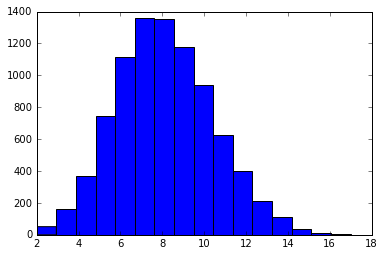

In [84]:
hist(lengths, bins=len(set(lengths)));

In [85]:
def pdist_good_turing_hack(counter, onecounter, base=1/26., prior=1e-8):
    """The probability of word, given evidence from the counter.
    For unknown words, look at the one-counts from onecounter, based on length.
    This gets ideas from Good-Turing, but doesn't implement all of it.
    prior is an additional factor to make unknowns less likely.
    base is how much we attenuate probability for each letter beyond longest."""
    N = sum(counter.values())
    N2 = sum(onecounter.values())
    lengths = map(len, [w for w in onecounter if onecounter[w] == 1])
    ones = Counter(lengths)
    longest = max(ones)
    return (lambda word: 
            counter[word] / N if (word in counter) 
            else prior * (ones[len(word)] / N2 or 
                          ones[longest] / N2 * base ** (len(word)-longest)))

# Redefine P1w
P1w = pdist_good_turing_hack(COUNTS1, COUNTS)

In [86]:
segment.cache.clear()
segment('thisisatestofsegmentationofaverylongsequenceofwords')

['this',
 'is',
 'a',
 'test',
 'of',
 'segmentation',
 'of',
 'a',
 'very',
 'long',
 'sequence',
 'of',
 'words']

In [87]:
print P1w('francisco')
print P1w('individuals')

7.73314623661e-05
7.72494966889e-05


In [88]:
print [bigram for bigram in COUNTS2 if bigram.endswith('francisco')]

['San francisco', 'san francisco']


In [89]:
print [bigram for bigram in COUNTS2 if bigram.endswith('individuals')]

['are individuals', 'other individuals', 'on individuals', 'infected individuals', 'in individuals', 'where individuals', 'or individuals', 'which individuals', 'to individuals', 'both individuals', 'help individuals', 'more individuals', 'interested individuals', 'from individuals', '<S> individuals', 'income individuals', 'these individuals', 'about individuals', 'the individuals', 'among individuals', 'some individuals', 'those individuals', 'by individuals', 'minded individuals', 'These individuals', 'qualified individuals', 'certain individuals', 'different individuals', 'For individuals', 'few individuals', 'and individuals', 'two individuals', 'for individuals', 'between individuals', 'affected individuals', 'healthy individuals', 'private individuals', 'with individuals', 'following individuals', 'as individuals', 'such individuals', 'that individuals', 'all individuals', 'of individuals', 'many individuals']


### Secret Codes

In [90]:
def rot(msg, n=13): 
    "Encode a message with a rotation (Caesar) cipher." 
    return encode(msg, alphabet[n:]+alphabet[:n])

def encode(msg, key): 
    "Encode a message with a substitution cipher." 
    table = string.maketrans(upperlower(alphabet), upperlower(key))
    return msg.translate(table) 

def upperlower(text): return text.upper() + text.lower()

In [91]:
rot('This is a secret message.', 1)

'Uijt jt b tfdsfu nfttbhf.'

In [92]:
rot('This is a secret message.')

'Guvf vf n frperg zrffntr.'

In [93]:
rot(rot('This is a secret message.'))

'This is a secret message.'

In [94]:
def decode_rot(secret):
    "Decode a secret message that has been encoded with a rotation cipher."
    candidates = [rot(secret, i) for i in range(len(alphabet))]
    return max(candidates, key=lambda msg: Pwords(tokens(msg)))

In [95]:
msg = 'Who knows the answer?'
secret = rot(msg, 17)

print(secret)
print(decode_rot(secret))

Nyf befnj kyv rejnvi?
Who knows the answer?


In [96]:
def encode(msg, key): 
    "Encode a message with a substitution cipher; remove non-letters." 
    msg = cat(tokens(msg))  ## Change here
    table = string.maketrans(upperlower(alphabet), upperlower(key))
    return msg.translate(table) 

In [97]:
def decode_rot(secret):
    """Decode a secret message that has been encoded with a rotation cipher,
    and which has had all the non-letters squeezed out."""
    candidates = [segment(rot(secret, i)) for i in range(len(alphabet))]
    return max(candidates, key=lambda msg: Pwords(msg))

In [98]:
msg = 'Who knows the answer this time? Anyone? Bueller?'
secret = rot(msg, 19)

print(secret)
print(decode_rot(secret))

NameError: global name 'cat' is not defined

In [99]:
candidates = [segment(rot(secret, i)) for i in range(len(alphabet))]

for c in candidates:
    print c, Pwords(c)

NameError: global name 'cat' is not defined